# Modelo de activación a 45D - Balanceado

In [1]:
import pandas as pd
import numpy as np
import pyodbc
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
#from boruta import BorutaPy
from time import time
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder #transformar variables 0,1
import itertools
import scipy.stats as ss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## Importando Data

In [2]:
time_start = time()

cnxn = pyodbc.connect('DRIVER={SQL Server Native Client 11.0};SERVER=svrrcc;DATABASE=BDANALYTICS;Trusted_Connection=yes')

query = """SELECT *
            FROM gm_Universo_Activacion2"""
df1 = pd.read_sql(query, con=cnxn)
cnxn.close()

time_end = time()
print ("Time: ", np.round((time_end - time_start)/60,2)," minutes")

('Time: ', 1.15, ' minutes')


In [ ]:
#df1.to_csv('data123.csv', header=True, index=True)

In [3]:
df1.head()

,FLAG_ACT_45D,IDENCUENTA,TipDoc,NumDoc,sexo,nombre_producto,FLAG_LIMA,ZONA_APEIM,GIRO_PROB,EstadoCivil,...,SALDO_TC_MAX_6M_BBVA,SALDO_TC_MAX_3M_PICH,SALDO_TC_MAX_6M_PICH,SALDO_TC_MAX_3M_BENCH,SALDO_TC_MAX_6M_BENCH,SALDO_TC_MAX_3M_RETAIL,SALDO_TC_MAX_6M_RETAIL,SALDO_TC_MAX_3M_OTROS,SALDO_TC_MAX_6M_OTROS,RECENCY_APP_BEFORE_ACT
0,1,229493,1,40546887,F,MILES,Lima,ZONA 3,VACIO,SOLTERO,...,2156.9,0.0,0.0,2156.90,2156.90,881.35,881.35,0.0,0.0,11.0
1,1,230176,1,09356008,M,MILES,Lima,ZONA 5,VACIO,CASADO,...,0.0,0.0,0.0,24403.89,26154.29,14985.46,14985.46,0.0,0.0,NaN
2,1,231412,1,02827679,M,MILES,Provincia,OTROS,VACIO,CASADO,...,0.0,0.0,0.0,8528.69,8528.69,41.39,41.39,0.0,0.0,5.0
3,1,231487,1,46151706,M,MILES,Lima,ZONA 7,VACIO,SOLTERO,...,0.0,0.0,0.0,49364.60,49364.60,0.00,0.00,0.0,0.0,2.0
4,1,231679,1,06729083,F,MILES,Lima,ZONA 6,VACIO,VIUDO,...,0.0,0.0,0.0,7583.88,14997.02,0.00,0.00,7347.1,7347.1,NaN


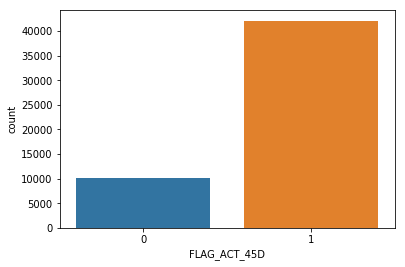

In [4]:
sns.countplot(x='FLAG_ACT_45D',data=df1)

In [5]:
df1.describe()

,FLAG_ACT_45D,NRO_TITULOS,edad_ent,LC_DINERS_SOLES,DIAS_FECENTREGA,NRO_SEGUROS_ACTIVOS,INGRESO_MENSUAL,NRO_HIJOS,SALDO_TC_UM_BCP,SALDO_TC_3M_BCP,...,SALDO_TC_MAX_6M_BBVA,SALDO_TC_MAX_3M_PICH,SALDO_TC_MAX_6M_PICH,SALDO_TC_MAX_3M_BENCH,SALDO_TC_MAX_6M_BENCH,SALDO_TC_MAX_3M_RETAIL,SALDO_TC_MAX_6M_RETAIL,SALDO_TC_MAX_3M_OTROS,SALDO_TC_MAX_6M_OTROS,RECENCY_APP_BEFORE_ACT
count,52313.000000,52313.000000,52313.000000,52313.000000,52313.000000,52313.000000,51433.000000,52313.000000,52313.000000,52313.000000,...,52313.000000,52313.000000,52313.000000,52313.000000,52313.000000,52313.000000,52313.000000,52313.000000,52313.000000,13120.000000
mean,0.804523,0.843022,39.726091,13477.213424,9.192323,1.998605,3223.823153,0.521400,3341.233782,3335.941328,...,1846.676873,14.333822,23.631745,9061.288413,10215.995825,1993.702222,2405.706190,771.974591,955.627053,11.422561
std,0.396571,1.092269,10.579752,12439.397871,19.906087,1.513441,1587.419449,0.920908,11428.515585,11012.443323,...,7627.976216,344.146227,433.132975,17257.882279,18407.441058,4624.292891,5158.843563,3886.521815,4419.055865,44.660993
min,0.000000,0.000000,21.000000,167.550000,0.000000,0.000000,696.890000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,31.000000,5026.500000,4.000000,1.000000,2077.620000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,36.300000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.000000,37.000000,8467.977000,6.000000,2.000000,2686.320000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2462.920000,3255.510000,247.800000,467.560000,0.000000,0.000000,3.000000
75%,1.000000,2.000000,47.000000,17425.200000,9.000000,3.000000,3944.050000,1.000000,608.000000,933.300000,...,0.000000,0.000000,0.000000,9351.340000,10957.400000,1874.640000,2448.290000,0.000000,0.000000,7.000000
max,1.000000,10.000000,84.000000,100530.000000,517.000000,28.000000,10157.810000,11.000000,287995.500000,275477.280000,...,190600.990000,37914.560000,40797.890000,287995.500000,293362.390000,77061.550000,81250.720000,109977.870000,128979.470000,596.000000


In [6]:
df=df1.copy()

In [7]:
#Eliminamos 'IDENCUENTA', 'TipDoc', 'NumDoc'

df=df.drop(columns=['IDENCUENTA', 'TipDoc', 'NumDoc',])

df.shape

(52313, 130)

## Gráficos de caja

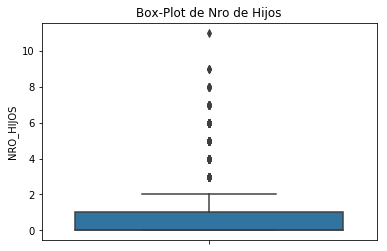

In [8]:
sns.boxplot(y = "NRO_HIJOS",data=df)
plt.title("Box-Plot de Nro de Hijos")
plt.show()

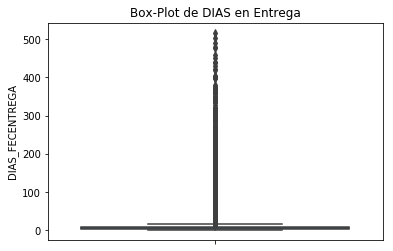

In [9]:
sns.boxplot(y = "DIAS_FECENTREGA",data=df)
plt.title("Box-Plot de DIAS en Entrega")
plt.show()

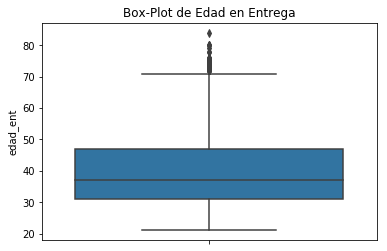

In [10]:
sns.boxplot(y = "edad_ent",data=df)
plt.title("Box-Plot de Edad en Entrega")
plt.show()

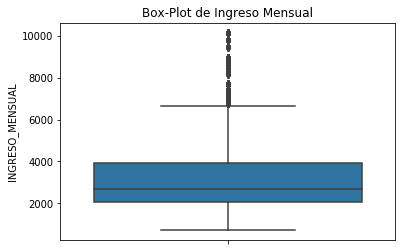

In [11]:
sns.boxplot(y = "INGRESO_MENSUAL",data=df)
plt.title("Box-Plot de Ingreso Mensual")
plt.show()

In [12]:
nullseries = df.isnull().sum()
print(nullseries[nullseries > 0])

EstadoCivil                1904
TIPO_GRADO                29002
TIPO_SEGURO                6392
REGIMEN                    6392
TIPO_PLAN                  6392
GRUPO_CARGO_LABORAL          58
FLG_DEPEN                   880
NIVEL_RIESGO_BCO            880
INGRESO_MENSUAL             880
RECENCY_APP_BEFORE_ACT    39193
dtype: int64


## Imputar variables

In [13]:
df["EstadoCivil"].fillna(df["EstadoCivil"].mode()[0], inplace = True)
df["TIPO_GRADO"].fillna(df["TIPO_GRADO"].mode()[0], inplace = True)
df["TIPO_SEGURO"].fillna(df["TIPO_SEGURO"].mode()[0], inplace = True)
df["REGIMEN"].fillna(df["REGIMEN"].mode()[0], inplace = True)
df["TIPO_PLAN"].fillna(df["TIPO_PLAN"].mode()[0], inplace = True)
df["GRUPO_CARGO_LABORAL"].fillna(df["GRUPO_CARGO_LABORAL"].mode()[0], inplace = True)
df["FLG_DEPEN"].fillna(df["FLG_DEPEN"].mode()[0], inplace = True)
df["NIVEL_RIESGO_BCO"].fillna(df["NIVEL_RIESGO_BCO"].mode()[0], inplace = True)
df["INGRESO_MENSUAL"].fillna(df["INGRESO_MENSUAL"].median(), inplace = True)
df["RECENCY_APP_BEFORE_ACT"].fillna(0, inplace = True)

In [14]:
nullseries = df.isnull().sum()
print(nullseries[nullseries > 0])

Series([], dtype: int64)


## Generación de variables dummies

In [15]:
data = df.copy()

In [16]:
pd.DataFrame(data.dtypes)

,0
FLAG_ACT_45D,int64
sexo,object
nombre_producto,object
FLAG_LIMA,object
ZONA_APEIM,object
GIRO_PROB,object
EstadoCivil,object
TIPO_GRADO,object
NRO_TITULOS,int64
edad_ent,int64


In [17]:
# sexo

#0 F
#1 M

labelencoder_X = LabelEncoder()
data.sexo = labelencoder_X.fit_transform(data.sexo) # All rows and first column i.e country column
print(data.sexo.head())


0    0
1    1
2    1
3    1
4    0
Name: sexo, dtype: int32


In [18]:
data['FLAG_LIMA'].value_counts()

Lima         42167
Provincia    10066
                80
Name: FLAG_LIMA, dtype: int64

In [19]:
#FLAG_LIMA --Reemplazando los vacios

data['FLAG_LIMA'] = data['FLAG_LIMA'].fillna('Lima')
data.FLAG_LIMA=data.FLAG_LIMA.replace('','Lima')

labelencoder_X = LabelEncoder()
data.FLAG_LIMA = labelencoder_X.fit_transform(data.FLAG_LIMA) # All rows and first column i.e country column
print(data.FLAG_LIMA.head())

#0 Lima
#1 Provincia

0    0
1    0
2    1
3    0
4    0
Name: FLAG_LIMA, dtype: int32


In [20]:
# FLAG_LIMA
data.FLAG_LIMA.unique()

array([0, 1], dtype=int64)

In [21]:
# ESTADOCIVIL
data.EstadoCivil.unique()

array([u'SOLTERO', u'CASADO', u'VIUDO', u'DIVORCIADO'], dtype=object)

In [22]:
# ESTADOCIVIL
data_ec_dummies1 = pd.get_dummies(data["EstadoCivil"], prefix = 'EstCivil')#, drop_first = True)

data = pd.concat([data,data_ec_dummies1], axis = 1)

del data["EstadoCivil"]

In [23]:
# nombre_producto
data.replace({'SPECIAL EDITION': 'SPEED'}, inplace=True)
data.replace({'DINERS HIRAOKA': 'DINHK'}, inplace=True)
data.replace({'CARTE BLANCHE': 'CARBL'}, inplace=True)
data.nombre_producto.unique()

array([u'MILES', 'SPEED', 'DINHK', u'DINERS', 'CARBL'], dtype=object)

In [24]:
# nombre_producto
data_ec_dummies2 = pd.get_dummies(data["nombre_producto"], prefix = 'nom_prod')#, drop_first = True)

data = pd.concat([data,data_ec_dummies2], axis = 1)

del data["nombre_producto"]

In [ ]:
# LIMA/PROV
#data.FLAG_LIMA.unique()

In [ ]:
#LIMA/PROV
#data_ec_dummies3 = pd.get_dummies(data["FLAG_LIMA"], prefix = 'FLAG_LIMA')#, drop_first = True)

#data = pd.concat([data,data_ec_dummies3], axis = 1)

#del data["FLAG_LIMA"]

In [25]:
data.replace({'ZONA 1': 'ZONA_1'}, inplace=True)
data.replace({'ZONA 2': 'ZONA_2'}, inplace=True)
data.replace({'ZONA 3': 'ZONA_3'}, inplace=True)
data.replace({'ZONA 4': 'ZONA_4'}, inplace=True)
data.replace({'ZONA 5': 'ZONA_5'}, inplace=True)
data.replace({'ZONA 6': 'ZONA_6'}, inplace=True)
data.replace({'ZONA 7': 'ZONA_7'}, inplace=True)
data.replace({'ZONA 8': 'ZONA_8'}, inplace=True)

In [26]:
#ZONA_APEIM
data.ZONA_APEIM.unique()

array(['ZONA_3', 'ZONA_5', u'OTROS', 'ZONA_7', 'ZONA_6', 'ZONA_8',
       u'ZONA 9', u'ZONA 10', 'ZONA_2', 'ZONA_1', 'ZONA_4'], dtype=object)

In [27]:
# ZONA_APEIM
data_ec_dummies4 = pd.get_dummies(data["ZONA_APEIM"], prefix = 'ZONA_APEIM')#, drop_first = True)

data = pd.concat([data,data_ec_dummies4], axis = 1)

del data["ZONA_APEIM"]

In [28]:
# grupo data laboral
data.GRUPO_CARGO_LABORAL = data.GRUPO_CARGO_LABORAL.astype(int)
data.GRUPO_CARGO_LABORAL.unique()

array([3, 2, 4, 1, 5], dtype=int64)

In [29]:
# grupo cargo laboral
data_ec_dummies5 = pd.get_dummies(data["GRUPO_CARGO_LABORAL"], prefix = 'GRUPO_CLAB')#, drop_first = True)

data = pd.concat([data,data_ec_dummies5], axis = 1)

del data["GRUPO_CARGO_LABORAL"]

In [30]:
# TIPO_seguro
data.TIPO_SEGURO.unique()

array([u'ESSALUD', u'ONCOSALUD', u'PARTICULARES', u'EPS', u'SIS',
       u'CLINICA', u'SANIDADES', u'OTROS'], dtype=object)

In [31]:
# Tipo_seguro
data_ec_dummies6 = pd.get_dummies(data["TIPO_SEGURO"], prefix = 'TIPO_SEGURO')#, drop_first = True)

data = pd.concat([data,data_ec_dummies6], axis = 1)

del data["TIPO_SEGURO"]

In [32]:
# TIPO GRADO -- preguntar si sirve convertir a dummie
data.TIPO_GRADO.unique()

array([u'B', u'T', u'M', u'D', u'S'], dtype=object)

In [33]:
#TIPO_GRADO
data_ec_dummies7 = pd.get_dummies(data["TIPO_GRADO"], prefix = 'TIP_GRADO')#, drop_first = True)

data = pd.concat([data,data_ec_dummies7], axis = 1)

del data["TIPO_GRADO"]

In [34]:
# DESESTIMACIÓN DE VARIABLES
data=data.drop(columns=["TIPO_PLAN"])
data=data.drop(columns=["REGIMEN"])

In [35]:
data.FLG_DEPEN = data.FLG_DEPEN.astype(int)
data.FLG_DEPEN.unique()

array([1, 0], dtype=int64)

In [36]:
data.head() # VISTA DE VALIDACIÓN

,FLAG_ACT_45D,sexo,FLAG_LIMA,GIRO_PROB,NRO_TITULOS,edad_ent,LC_DINERS_SOLES,DIAS_FECENTREGA,FLG_PROFESIONAL,FLG_SEGURO_SALUD,...,TIPO_SEGURO_ONCOSALUD,TIPO_SEGURO_OTROS,TIPO_SEGURO_PARTICULARES,TIPO_SEGURO_SANIDADES,TIPO_SEGURO_SIS,TIP_GRADO_B,TIP_GRADO_D,TIP_GRADO_M,TIP_GRADO_S,TIP_GRADO_T
0,1,0,0,VACIO,1,38,7707.3,21,1,1,...,0,0,0,0,0,1,0,0,0,0
1,1,1,0,VACIO,0,56,4356.3,5,0,1,...,0,0,0,0,0,0,0,0,0,1
2,1,1,1,VACIO,0,47,10723.2,7,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1,1,0,VACIO,2,29,18765.6,4,1,1,...,1,0,0,0,0,0,0,0,0,1
4,1,0,0,VACIO,0,58,9593.2,3,0,1,...,0,0,0,0,0,0,0,0,0,1


## Matrices de correlacción y mapas de calor

In [37]:
data.columns.values #validando nombres de columnas

array([u'FLAG_ACT_45D', u'sexo', u'FLAG_LIMA', u'GIRO_PROB',
       u'NRO_TITULOS', u'edad_ent', u'LC_DINERS_SOLES',
       u'DIAS_FECENTREGA', u'FLG_PROFESIONAL', u'FLG_SEGURO_SALUD',
       u'FLG_EPS', u'FLG_SIS', u'FLG_ONCO', u'FLG_ESSALUD',
       u'NRO_SEGUROS_ACTIVOS', u'FLG_DEPEN', u'NIVEL_RIESGO_BCO',
       u'INGRESO_MENSUAL', u'NRO_HIJOS', u'SALDO_TC_UM_BCP',
       u'SALDO_TC_3M_BCP', u'SALDO_TC_6M_BCP', u'SALDO_TC_UM_IBK',
       u'SALDO_TC_3M_IBK', u'SALDO_TC_6M_IBK', u'FLG_VEH_UM',
       u'FLG_VEH_U3M', u'FLG_VEH_U6M', u'FLG_HIP_UM', u'FLG_HIP_U3M',
       u'FLG_HIP_U6M', u'FLG_PLD_UM', u'FLG_PLD_U3M', u'FLG_PLD_U6M',
       u'FLG_DISEF_UM', u'FLG_DISEF_U3M', u'FLG_DISEF_U6M',
       u'FLG_APP_BEFORE_ACT', u'FECHA_APP_BEFORE', u'FLG_LP_UM',
       u'FLG_LP_U3M', u'FLG_LP_U6M', u'FLG_VEN_JUD_UM',
       u'FLG_VEN_JUD_U3M', u'FLG_VEN_JUD_U6M', u'NUM_TC_6M', u'NUM_TC_3M',
       u'NUM_TC_UM', u'NUM_TC_BENCH_6M', u'NUM_TC_BENCH_3M',
       u'NUM_TC_BENCH_UM', u'NUM_TC_RETAIL

In [38]:
nullseries = data.isnull().sum()
print(nullseries[nullseries > 0])

Series([], dtype: int64)


### Matriz de correlación variables categóricas - Cramer

In [39]:
#Mostrando variables categoricas
data.select_dtypes("object").columns

Index([u'GIRO_PROB', u'FLG_PROFESIONAL', u'FLG_SEGURO_SALUD', u'FLG_EPS',
       u'FLG_SIS', u'FLG_ONCO', u'FLG_ESSALUD', u'NIVEL_RIESGO_BCO',
       u'FLG_VEH_UM', u'FLG_VEH_U3M', u'FLG_VEH_U6M', u'FLG_HIP_UM',
       u'FLG_HIP_U3M', u'FLG_HIP_U6M', u'FLG_PLD_UM', u'FLG_PLD_U3M',
       u'FLG_PLD_U6M', u'FLG_DISEF_UM', u'FLG_DISEF_U3M', u'FLG_DISEF_U6M',
       u'FLG_APP_BEFORE_ACT', u'FECHA_APP_BEFORE', u'FLG_LP_UM', u'FLG_LP_U3M',
       u'FLG_LP_U6M', u'FLG_VEN_JUD_UM', u'FLG_VEN_JUD_U3M',
       u'FLG_VEN_JUD_U6M', u'MAX_CALIF_6M', u'MAX_CALIF_3M', u'MAX_CALIF_UM'],
      dtype='object')

In [40]:
#Creando funcion para la matriz de contingencia
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorical-categorical association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [41]:
#Variables categóricas
cols=['FLAG_ACT_45D', 'sexo', 'FLAG_LIMA', 'FLG_PROFESIONAL', 'FLG_SEGURO_SALUD',
    'FLG_EPS', 'FLG_SIS', 'FLG_ONCO', 'FLG_ESSALUD', 'FLG_DEPEN',
    'NIVEL_RIESGO_BCO','FLG_VEH_UM', 'FLG_VEH_U3M', 'FLG_VEH_U6M', 'FLG_HIP_UM',
    'FLG_HIP_U3M', 'FLG_HIP_U6M', 'FLG_PLD_UM', 'FLG_PLD_U3M',
    'FLG_PLD_U6M', 'FLG_DISEF_UM', 'FLG_DISEF_U3M', 'FLG_DISEF_U6M',
    'FLG_APP_BEFORE_ACT', 'FLG_LP_UM', 'FLG_LP_U3M', 'FLG_LP_U6M', 'FLG_VEN_JUD_UM',
    'FLG_VEN_JUD_U3M', 'FLG_VEN_JUD_U6M',        
    'EstCivil_CASADO', 'EstCivil_DIVORCIADO', 'EstCivil_SOLTERO',
    'EstCivil_VIUDO', 'nom_prod_CARBL', 'nom_prod_DINERS',
    'nom_prod_DINHK', 'nom_prod_MILES', 'nom_prod_SPEED',
    'ZONA_APEIM_OTROS', 'ZONA_APEIM_ZONA 10', 'ZONA_APEIM_ZONA 9',
    'ZONA_APEIM_ZONA_1', 'ZONA_APEIM_ZONA_2', 'ZONA_APEIM_ZONA_3',
    'ZONA_APEIM_ZONA_4', 'ZONA_APEIM_ZONA_5', 'ZONA_APEIM_ZONA_6',
    'ZONA_APEIM_ZONA_7', 'ZONA_APEIM_ZONA_8', 'GRUPO_CLAB_1',
    'GRUPO_CLAB_2', 'GRUPO_CLAB_3', 'GRUPO_CLAB_4', 'GRUPO_CLAB_5',
    'TIPO_SEGURO_CLINICA', 'TIPO_SEGURO_EPS', 'TIPO_SEGURO_ESSALUD',
    'TIPO_SEGURO_ONCOSALUD', 'TIPO_SEGURO_OTROS',
    'TIPO_SEGURO_PARTICULARES', 'TIPO_SEGURO_SANIDADES',
    'TIPO_SEGURO_SIS', 'TIP_GRADO_B', 'TIP_GRADO_D', 'TIP_GRADO_M',
    'TIP_GRADO_S', 'TIP_GRADO_T']

corrM = np.zeros((len(cols),len(cols)))
# there's probably a nice pandas way to do this
for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_corrected_stat(pd.crosstab(data[col1], data[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]

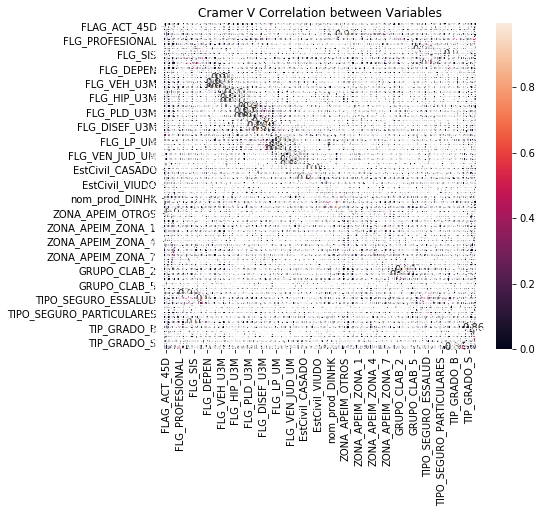

In [42]:
#Mapa de calor
corr = pd.DataFrame(corrM, index=cols, columns=cols)
fig, ax = plt.subplots(figsize=(7, 6))
ax = sns.heatmap(corr, annot=True, ax=ax); ax.set_title("Cramer V Correlation between Variables");

In [43]:
# resultados matriz correlación - variables categóricas
df_matrix=corr
df_matrix

,FLAG_ACT_45D,sexo,FLAG_LIMA,FLG_PROFESIONAL,FLG_SEGURO_SALUD,FLG_EPS,FLG_SIS,FLG_ONCO,FLG_ESSALUD,FLG_DEPEN,...,TIPO_SEGURO_ONCOSALUD,TIPO_SEGURO_OTROS,TIPO_SEGURO_PARTICULARES,TIPO_SEGURO_SANIDADES,TIPO_SEGURO_SIS,TIP_GRADO_B,TIP_GRADO_D,TIP_GRADO_M,TIP_GRADO_S,TIP_GRADO_T
FLAG_ACT_45D,0.000000,0.034035,0.075059,0.058409,0.013735,0.004844,0.038142,0.054533,0.046527,0.027812,...,0.054730,0.011353,0.033498,0.011456,0.032538,0.036093,0.001964,0.009619,0.003764,0.037105
sexo,0.034035,0.000000,0.050421,0.096487,0.016378,0.096341,0.009793,0.075245,0.028862,0.018897,...,0.075881,0.002971,0.011376,0.064493,0.010792,0.010468,0.005643,0.007380,0.004039,0.005174
FLAG_LIMA,0.075059,0.050421,0.000000,0.072883,0.009045,0.032212,0.015324,0.001667,0.068373,0.042666,...,0.002228,0.015534,0.015607,0.037504,0.014868,0.025383,0.027587,0.038023,0.001074,0.000399
FLG_PROFESIONAL,0.058409,0.096487,0.072883,0.000000,0.033547,0.024885,0.120905,0.154714,0.085486,0.091071,...,0.155404,0.006535,0.076231,0.042609,0.111214,0.431704,0.066845,0.212082,0.035926,0.504604
FLG_SEGURO_SALUD,0.013735,0.016378,0.009045,0.033547,0.000000,0.152887,0.062000,0.150535,0.198103,0.179757,...,0.149823,0.008882,0.108030,0.041507,0.055622,0.008878,0.006894,0.016960,0.004420,0.018014
FLG_EPS,0.004844,0.096341,0.032212,0.024885,0.152887,0.000000,0.106921,0.259248,0.341129,0.139398,...,0.258024,0.016390,0.186096,0.071724,0.095960,0.011945,0.008548,0.035720,0.000250,0.008079
FLG_SIS,0.038142,0.009793,0.015324,0.120905,0.062000,0.106921,0.000000,0.105275,0.138566,0.272159,...,0.104777,0.005512,0.075518,0.028873,0.897453,0.049348,0.010169,0.036292,0.005366,0.064449
FLG_ONCO,0.054533,0.075245,0.001667,0.154714,0.150535,0.259248,0.105275,0.000000,0.335884,0.063222,...,0.995219,0.016121,0.183234,0.070618,0.094482,0.077585,0.011128,0.058436,0.001292,0.099840
FLG_ESSALUD,0.046527,0.028862,0.068373,0.085486,0.198103,0.341129,0.138566,0.335884,0.000000,0.101376,...,0.334298,0.021527,0.241120,0.092991,0.124372,0.076242,0.003847,0.019312,0.008032,0.076413
FLG_DEPEN,0.027812,0.018897,0.042666,0.091071,0.179757,0.139398,0.272159,0.063222,0.101376,0.000000,...,0.068747,0.032720,0.045254,0.196104,0.249330,0.045891,0.010656,0.023103,0.008807,0.055063


In [44]:
#priorización de variables 
df_var_cat=pd.DataFrame({'VARIABLES':df_matrix.columns.values,'FLAG_ACT_45D':df_matrix.FLAG_ACT_45D}).sort_values(['FLAG_ACT_45D'], ascending=[0])
df_var_cat.values

array([[0.28513917962378477, 'FLG_APP_BEFORE_ACT'],
       [0.10569875180895752, 'nom_prod_DINHK'],
       [0.07505883434358172, 'FLAG_LIMA'],
       [0.07423514556098997, 'ZONA_APEIM_OTROS'],
       [0.06467488876261403, 'GRUPO_CLAB_2'],
       [0.06057606996084895, 'ZONA_APEIM_ZONA_7'],
       [0.05840892785555533, 'FLG_PROFESIONAL'],
       [0.055611056044364705, 'GRUPO_CLAB_3'],
       [0.05472976700146068, 'TIPO_SEGURO_ONCOSALUD'],
       [0.054532608323609885, 'FLG_ONCO'],
       [0.05368625324274328, 'TIPO_SEGURO_ESSALUD'],
       [0.047175331407536325, 'nom_prod_DINERS'],
       [0.04652739949037507, 'FLG_ESSALUD'],
       [0.045967348179367, 'FLG_DISEF_UM'],
       [0.042831746719306146, 'NIVEL_RIESGO_BCO'],
       [0.04160341282781288, 'FLG_DISEF_U3M'],
       [0.04051165351896386, 'ZONA_APEIM_ZONA_6'],
       [0.04031884337667583, 'nom_prod_SPEED'],
       [0.0381421807508874, 'FLG_SIS'],
       [0.03794595822309296, 'FLG_DISEF_U6M'],
       [0.03710522141032123, 'TIP_GRADO_

In [45]:
# DESESTIMACIÓN DE VARIABLES
df_categoricas=df_var_cat.drop(["FLAG_LIMA","FLG_ONCO","FLG_ESSALUD","FLG_SIS","FLG_VEH_U3M"
                           ,"FLG_VEH_UM","FLG_DISEF_U3M","FLG_DISEF_U6M","FLG_LP_U3M","FLG_PLD_U6M","FLG_PLD_U3M"
                           ,"FLG_LP_UM","FLG_SEGURO_SALUD","FLG_HIP_U3M","FLG_HIP_UM","FLG_EPS","FLG_VEN_JUD_U3M"
                           ,"FLG_VEN_JUD_UM","TIP_GRADO_T","TIP_GRADO_B","TIP_GRADO_M","TIP_GRADO_D","TIP_GRADO_S"])
df_categoricas.values

array([[0.28513917962378477, 'FLG_APP_BEFORE_ACT'],
       [0.10569875180895752, 'nom_prod_DINHK'],
       [0.07423514556098997, 'ZONA_APEIM_OTROS'],
       [0.06467488876261403, 'GRUPO_CLAB_2'],
       [0.06057606996084895, 'ZONA_APEIM_ZONA_7'],
       [0.05840892785555533, 'FLG_PROFESIONAL'],
       [0.055611056044364705, 'GRUPO_CLAB_3'],
       [0.05472976700146068, 'TIPO_SEGURO_ONCOSALUD'],
       [0.05368625324274328, 'TIPO_SEGURO_ESSALUD'],
       [0.047175331407536325, 'nom_prod_DINERS'],
       [0.045967348179367, 'FLG_DISEF_UM'],
       [0.042831746719306146, 'NIVEL_RIESGO_BCO'],
       [0.04051165351896386, 'ZONA_APEIM_ZONA_6'],
       [0.04031884337667583, 'nom_prod_SPEED'],
       [0.03559215336891048, 'EstCivil_CASADO'],
       [0.03403536363065979, 'sexo'],
       [0.03349760662883138, 'TIPO_SEGURO_PARTICULARES'],
       [0.032538363738614934, 'TIPO_SEGURO_SIS'],
       [0.032504083393178854, 'EstCivil_SOLTERO'],
       [0.031449295926325824, 'FLG_VEH_U6M'],
       [0.028

Conclusiones: 
1. Se elimina el FLG_Lima porque la mayoría de clientes esta concentrado ahí
2. En vez de crear un FLG por cada seguro se va a mantener la variable TIPO_SEGURO que discrimina mejor
3. En vez de tener un FLG por cada tipo de grado se va a mantener solo el FLG_PROFESIONAL
4. En cuanto a las variables RCC por rangos de tiempos se estan considerando mantener solo una ya sea una de 6M, 3M o UM

## Matriz de correlación variables cualitativas - Pearson

In [46]:
data['RECENCY_APP_BEFORE_ACT'].unique()

array([ 11.,   0.,   5.,   2.,  50.,  10.,  17.,   4.,   3.,  31.,  24.,
        33.,  25.,  16.,   1.,  37.,  40.,  32.,   7.,   6., 242., 218.,
         9.,   8., 568., 215., 157., 132., 156., 410., 243., 222., 316.,
       107., 416., 303., 118.,  38.,  27.,  23.,  34.,  14.,  29.,  30.,
        13.,  18.,  20.,  26.,  46.,  12.,  22.,  45.,  15.,  28.,  44.,
        42.,  21., 101., 442.,  19.,  41., 418.,  35., 313., 383.,  36.,
       346.,  48.,  64.,  39.,  43., 259., 117., 126.,  88., 580., 374.,
       356., 273.,  68., 366., 258., 308., 479., 269., 256., 217., 435.,
       335., 360.,  58., 577., 251., 135., 203.,  70., 183., 239., 405.,
       417.,  99., 322., 216., 581., 326., 478., 271., 194.,  95., 421.,
       224., 130.,  92., 349., 423., 120., 339., 509., 207., 179., 400.,
       380., 213.,  65., 578., 460., 296., 352., 158., 558., 153., 137.,
       298., 261., 252., 438., 291., 274., 528., 315., 279., 359., 392.,
        67., 267., 340., 280., 368., 485., 284., 37

In [47]:
#Variables numericas
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] 

df_numericas = data[['FLAG_ACT_45D','NRO_TITULOS','edad_ent', 'LC_DINERS_SOLES','RECENCY_APP_BEFORE_ACT',
    'DIAS_FECENTREGA', 'NRO_SEGUROS_ACTIVOS','INGRESO_MENSUAL', 'NRO_HIJOS','SALDO_TC_UM_BCP',
    'SALDO_TC_3M_BCP', 'SALDO_TC_6M_BCP','SALDO_TC_UM_IBK', 'SALDO_TC_3M_IBK',
    'SALDO_TC_6M_IBK','NUM_TC_6M', 'NUM_TC_3M','NUM_TC_UM', 'NUM_TC_BENCH_6M',
    'NUM_TC_BENCH_3M', 'NUM_TC_BENCH_UM', 'NUM_TC_RETAIL_6M', 'NUM_TC_RETAIL_3M',
    'NUM_TC_RETAIL_UM', 'NUM_TC_SALDO_6M', 'NUM_TC_SALDO_3M', 'NUM_TC_SALDO_UM',
    'NUM_TC_SALDO_BENCH_6M','NUM_TC_SALDO_BENCH_3M', 'NUM_TC_SALDO_BENCH_UM',
    'NUM_TC_SALDO_RETAIL_6M', 'NUM_TC_SALDO_RETAIL_3M','NUM_TC_SALDO_RETAIL_UM',
    'SALDO_TC_UM_SBP', 'SALDO_TC_3M_SBP','SALDO_TC_6M_SBP', 'SALDO_TC_UM_BBVA',
    'SALDO_TC_3M_BBVA','SALDO_TC_6M_BBVA', 'MAX_CALIF_6M', 'MAX_CALIF_3M',
    'MAX_CALIF_UM','SALDO_TC_UM_PICH', 'SALDO_TC_3M_PICH', 'SALDO_TC_6M_PICH',
    'LC_MAX_6M', 'LC_MAX_3M', 'LC_MAX_UM', 'SALDO_TC_UM_BENCH',
    'SALDO_TC_3M_BENCH', 'SALDO_TC_6M_BENCH', 'SALDO_TC_UM_RETAIL',
    'SALDO_TC_3M_RETAIL', 'SALDO_TC_6M_RETAIL', 'SALDO_TC_UM_OTROS',
    'SALDO_TC_3M_OTROS', 'SALDO_TC_6M_OTROS', 'LC_MAX_BENCH_6M',
    'LC_MAX_BENCH_3M', 'LC_MAX_BENCH_UM', 'MAX_RAT_USO_LINEA_6M',
    'MAX_RAT_USO_LINEA_3M', 'MAX_RAT_USO_LINEA_UM',
    'MAX_RAT_USO_LINEA_BENCH_6M', 'MAX_RAT_USO_LINEA_BENCH_3M',
    'MAX_RAT_USO_LINEA_BENCH_UM', 'MAX_RAT_USO_LINEA_RETAIL_6M',
    'MAX_RAT_USO_LINEA_RETAIL_3M', 'MAX_RAT_USO_LINEA_RETAIL_UM',
    'LC_MAX_OTROS_6M', 'LC_MAX_OTROS_3M', 'LC_MAX_OTROS_UM',
    'MAX_DM_TC_6M', 'MAX_DM_TC_3M', 'MAX_DM_TC_1M',
    'SALDO_TC_MAX_3M_BCP', 'SALDO_TC_MAX_6M_BCP',
    'SALDO_TC_MAX_3M_IBK', 'SALDO_TC_MAX_6M_IBK',
    'SALDO_TC_MAX_3M_SBP', 'SALDO_TC_MAX_6M_SBP',
    'SALDO_TC_MAX_3M_BBVA', 'SALDO_TC_MAX_6M_BBVA',
    'SALDO_TC_MAX_3M_PICH', 'SALDO_TC_MAX_6M_PICH',
    'SALDO_TC_MAX_3M_BENCH', 'SALDO_TC_MAX_6M_BENCH',
    'SALDO_TC_MAX_3M_RETAIL', 'SALDO_TC_MAX_6M_RETAIL',
    'SALDO_TC_MAX_3M_OTROS', 'SALDO_TC_MAX_6M_OTROS']]
df_numericas.columns.values

array([u'FLAG_ACT_45D', u'NRO_TITULOS', u'edad_ent', u'LC_DINERS_SOLES',
       u'RECENCY_APP_BEFORE_ACT', u'DIAS_FECENTREGA',
       u'NRO_SEGUROS_ACTIVOS', u'INGRESO_MENSUAL', u'NRO_HIJOS',
       u'SALDO_TC_UM_BCP', u'SALDO_TC_3M_BCP', u'SALDO_TC_6M_BCP',
       u'SALDO_TC_UM_IBK', u'SALDO_TC_3M_IBK', u'SALDO_TC_6M_IBK',
       u'NUM_TC_6M', u'NUM_TC_3M', u'NUM_TC_UM', u'NUM_TC_BENCH_6M',
       u'NUM_TC_BENCH_3M', u'NUM_TC_BENCH_UM', u'NUM_TC_RETAIL_6M',
       u'NUM_TC_RETAIL_3M', u'NUM_TC_RETAIL_UM', u'NUM_TC_SALDO_6M',
       u'NUM_TC_SALDO_3M', u'NUM_TC_SALDO_UM', u'NUM_TC_SALDO_BENCH_6M',
       u'NUM_TC_SALDO_BENCH_3M', u'NUM_TC_SALDO_BENCH_UM',
       u'NUM_TC_SALDO_RETAIL_6M', u'NUM_TC_SALDO_RETAIL_3M',
       u'NUM_TC_SALDO_RETAIL_UM', u'SALDO_TC_UM_SBP', u'SALDO_TC_3M_SBP',
       u'SALDO_TC_6M_SBP', u'SALDO_TC_UM_BBVA', u'SALDO_TC_3M_BBVA',
       u'SALDO_TC_6M_BBVA', u'MAX_CALIF_6M', u'MAX_CALIF_3M',
       u'MAX_CALIF_UM', u'SALDO_TC_UM_PICH', u'SALDO_TC_3M_PICH',
    

In [48]:
df_numericas.MAX_CALIF_6M = df_numericas.MAX_CALIF_6M.astype(int)
df_numericas.MAX_CALIF_3M = df_numericas.MAX_CALIF_3M.astype(int)
df_numericas.MAX_CALIF_UM = df_numericas.MAX_CALIF_UM.astype(int)

C:\ProgramData\Anaconda2\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [49]:
df_numericas.MAX_CALIF_UM.unique()

array([0, 1, 2, 4, 3], dtype=int64)

In [50]:
df_numericas.head()

,FLAG_ACT_45D,NRO_TITULOS,edad_ent,LC_DINERS_SOLES,RECENCY_APP_BEFORE_ACT,DIAS_FECENTREGA,NRO_SEGUROS_ACTIVOS,INGRESO_MENSUAL,NRO_HIJOS,SALDO_TC_UM_BCP,...,SALDO_TC_MAX_3M_BBVA,SALDO_TC_MAX_6M_BBVA,SALDO_TC_MAX_3M_PICH,SALDO_TC_MAX_6M_PICH,SALDO_TC_MAX_3M_BENCH,SALDO_TC_MAX_6M_BENCH,SALDO_TC_MAX_3M_RETAIL,SALDO_TC_MAX_6M_RETAIL,SALDO_TC_MAX_3M_OTROS,SALDO_TC_MAX_6M_OTROS
0,1,1,38,7707.3,11.0,21,1,1761.91,0,0.0,...,2156.9,2156.9,0.0,0.0,2156.90,2156.90,881.35,881.35,0.0,0.0
1,1,0,56,4356.3,0.0,5,1,4542.73,0,0.0,...,0.0,0.0,0.0,0.0,24403.89,26154.29,14985.46,14985.46,0.0,0.0
2,1,0,47,10723.2,5.0,7,1,1527.97,2,0.0,...,0.0,0.0,0.0,0.0,8528.69,8528.69,41.39,41.39,0.0,0.0
3,1,2,29,18765.6,2.0,4,3,6190.74,0,49364.6,...,0.0,0.0,0.0,0.0,49364.60,49364.60,0.00,0.00,0.0,0.0
4,1,0,58,9593.2,0.0,3,1,4802.96,0,0.0,...,0.0,0.0,0.0,0.0,7583.88,14997.02,0.00,0.00,7347.1,7347.1


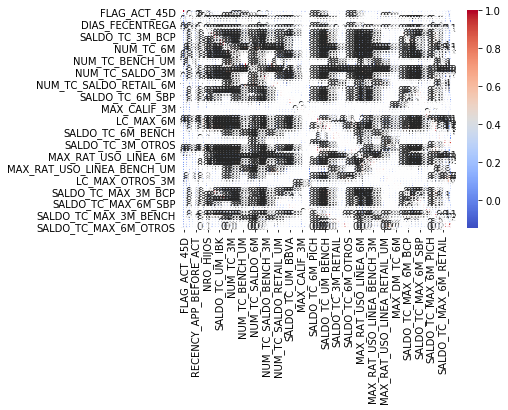

In [51]:
#Visualize the correlation using seaborn heatmap
sns.heatmap(df_numericas.corr(),annot=True,fmt="0.1f",cmap="coolwarm")
plt.show()

In [52]:
df_matrix_num=df_numericas.corr()
df_matrix_num

,FLAG_ACT_45D,NRO_TITULOS,edad_ent,LC_DINERS_SOLES,RECENCY_APP_BEFORE_ACT,DIAS_FECENTREGA,NRO_SEGUROS_ACTIVOS,INGRESO_MENSUAL,NRO_HIJOS,SALDO_TC_UM_BCP,...,SALDO_TC_MAX_3M_BBVA,SALDO_TC_MAX_6M_BBVA,SALDO_TC_MAX_3M_PICH,SALDO_TC_MAX_6M_PICH,SALDO_TC_MAX_3M_BENCH,SALDO_TC_MAX_6M_BENCH,SALDO_TC_MAX_3M_RETAIL,SALDO_TC_MAX_6M_RETAIL,SALDO_TC_MAX_3M_OTROS,SALDO_TC_MAX_6M_OTROS
FLAG_ACT_45D,1.000000,0.042046,-0.087388,0.041011,0.061646,-0.023313,0.050856,0.021462,-0.074231,0.022601,...,0.001874,-0.000434,0.006765,0.007026,0.020607,0.021110,0.006948,0.007818,-0.011560,-0.011569
NRO_TITULOS,0.042046,1.000000,-0.085191,0.155557,0.016520,0.008426,0.153470,0.159614,-0.077543,0.053491,...,0.085394,0.091799,-0.008846,-0.006382,0.079001,0.086460,-0.022766,-0.017268,-0.017190,-0.012796
edad_ent,-0.087388,-0.085191,1.000000,0.122842,-0.039511,-0.010699,-0.053026,0.161836,0.294457,0.044094,...,0.010289,0.009465,0.021821,0.019332,0.110164,0.111749,0.073542,0.075977,0.063716,0.065673
LC_DINERS_SOLES,0.041011,0.155557,0.122842,1.000000,0.031204,0.037836,0.182443,0.517536,0.065022,0.271621,...,0.157897,0.172085,0.018628,0.026194,0.408875,0.428670,0.041364,0.058491,0.042573,0.054860
RECENCY_APP_BEFORE_ACT,0.061646,0.016520,-0.039511,0.031204,1.000000,0.009353,0.021413,0.042083,-0.022254,0.001676,...,0.010360,0.009651,0.013549,0.064152,0.003973,0.006454,-0.004672,-0.003624,0.000311,0.001847
DIAS_FECENTREGA,-0.023313,0.008426,-0.010699,0.037836,0.009353,1.000000,0.015788,0.033843,0.026546,0.015305,...,0.010112,0.009479,0.010947,0.007354,0.023941,0.025025,0.021611,0.021455,0.010704,0.010592
NRO_SEGUROS_ACTIVOS,0.050856,0.153470,-0.053026,0.182443,0.021413,0.015788,1.000000,0.218056,0.040188,0.093302,...,0.053640,0.058573,-0.000601,0.000332,0.118739,0.128858,0.030939,0.037300,-0.000009,0.000368
INGRESO_MENSUAL,0.021462,0.159614,0.161836,0.517536,0.042083,0.033843,0.218056,1.000000,0.088720,0.338805,...,0.204573,0.224314,0.022173,0.032564,0.513010,0.537553,0.131146,0.148817,0.118836,0.131657
NRO_HIJOS,-0.074231,-0.077543,0.294457,0.065022,-0.022254,0.026546,0.040188,0.088720,1.000000,0.032440,...,0.011500,0.008704,0.003782,0.003211,0.070548,0.072033,0.075291,0.079085,0.033976,0.036954
SALDO_TC_UM_BCP,0.022601,0.053491,0.044094,0.271621,0.001676,0.015305,0.093302,0.338805,0.032440,1.000000,...,0.141306,0.158937,-0.000014,0.005110,0.670866,0.651430,0.055940,0.072049,0.062847,0.078489


In [53]:
df_matrix_num.columns.values

array([u'FLAG_ACT_45D', u'NRO_TITULOS', u'edad_ent', u'LC_DINERS_SOLES',
       u'RECENCY_APP_BEFORE_ACT', u'DIAS_FECENTREGA',
       u'NRO_SEGUROS_ACTIVOS', u'INGRESO_MENSUAL', u'NRO_HIJOS',
       u'SALDO_TC_UM_BCP', u'SALDO_TC_3M_BCP', u'SALDO_TC_6M_BCP',
       u'SALDO_TC_UM_IBK', u'SALDO_TC_3M_IBK', u'SALDO_TC_6M_IBK',
       u'NUM_TC_6M', u'NUM_TC_3M', u'NUM_TC_UM', u'NUM_TC_BENCH_6M',
       u'NUM_TC_BENCH_3M', u'NUM_TC_BENCH_UM', u'NUM_TC_RETAIL_6M',
       u'NUM_TC_RETAIL_3M', u'NUM_TC_RETAIL_UM', u'NUM_TC_SALDO_6M',
       u'NUM_TC_SALDO_3M', u'NUM_TC_SALDO_UM', u'NUM_TC_SALDO_BENCH_6M',
       u'NUM_TC_SALDO_BENCH_3M', u'NUM_TC_SALDO_BENCH_UM',
       u'NUM_TC_SALDO_RETAIL_6M', u'NUM_TC_SALDO_RETAIL_3M',
       u'NUM_TC_SALDO_RETAIL_UM', u'SALDO_TC_UM_SBP', u'SALDO_TC_3M_SBP',
       u'SALDO_TC_6M_SBP', u'SALDO_TC_UM_BBVA', u'SALDO_TC_3M_BBVA',
       u'SALDO_TC_6M_BBVA', u'MAX_CALIF_6M', u'MAX_CALIF_3M',
       u'MAX_CALIF_UM', u'SALDO_TC_UM_PICH', u'SALDO_TC_3M_PICH',
    

In [54]:
#priorización de variables 
df_var_num=pd.DataFrame({'VARIABLES':df_matrix_num.columns.values,'FLAG_ACT_45D':df_matrix_num.FLAG_ACT_45D}).sort_values(['FLAG_ACT_45D'], ascending=[0])
df_var_num.values


array([[1.0, u'FLAG_ACT_45D'],
       [0.08361711447135921, u'NUM_TC_SALDO_BENCH_UM'],
       [0.08216809157507336, u'NUM_TC_SALDO_BENCH_3M'],
       [0.07997304804579342, u'MAX_RAT_USO_LINEA_BENCH_6M'],
       [0.07703900117357936, u'MAX_RAT_USO_LINEA_BENCH_3M'],
       [0.07659949338489319, u'NUM_TC_SALDO_BENCH_6M'],
       [0.07211083821337747, u'MAX_RAT_USO_LINEA_3M'],
       [0.06975352138064433, u'NUM_TC_SALDO_UM'],
       [0.06951280449348114, u'NUM_TC_SALDO_3M'],
       [0.06380057336985838, u'NUM_TC_SALDO_6M'],
       [0.061645652753577404, u'RECENCY_APP_BEFORE_ACT'],
       [0.05983185536267644, u'MAX_RAT_USO_LINEA_BENCH_UM'],
       [0.058518664991878556, u'MAX_RAT_USO_LINEA_6M'],
       [0.056019687704456075, u'MAX_RAT_USO_LINEA_UM'],
       [0.05085611470872756, u'NRO_SEGUROS_ACTIVOS'],
       [0.048440549810713246, u'MAX_RAT_USO_LINEA_RETAIL_6M'],
       [0.04615244879865893, u'MAX_RAT_USO_LINEA_RETAIL_3M'],
       [0.04204579816697947, u'NRO_TITULOS'],
       [0.04101109

In [55]:
# DESESTIMACIÓN DE VARIABLES
df_numericas=df_var_num.drop(["NUM_TC_SALDO_BENCH_UM","NUM_TC_SALDO_BENCH_6M"
                              ,"MAX_RAT_USO_LINEA_BENCH_3M","MAX_RAT_USO_LINEA_BENCH_UM"
                              ,"MAX_RAT_USO_LINEA_3M","MAX_RAT_USO_LINEA_UM"
                             ,"NUM_TC_SALDO_UM","NUM_TC_SALDO_6M"
                             ,"MAX_RAT_USO_LINEA_RETAIL_3M","MAX_RAT_USO_LINEA_RETAIL_UM"
                             ,"NUM_TC_SALDO_RETAIL_6M","NUM_TC_SALDO_RETAIL_UM"
                             ,"SALDO_TC_MAX_3M_BCP","SALDO_TC_6M_BCP"
                             ,"SALDO_TC_MAX_3M_BENCH"
                             ,"SALDO_TC_UM_BCP","SALDO_TC_3M_BCP"
                             ,"SALDO_TC_3M_BENCH","SALDO_TC_UM_BENCH","SALDO_TC_6M_BENCH"
                             ,"SALDO_TC_MAX_6M_IBK"
                             ,"SALDO_TC_6M_IBK","SALDO_TC_UM_IBK","SALDO_TC_3M_IBK"
                             ,"LC_MAX_BENCH_6M","LC_MAX_BENCH_UM"
                             ,"NUM_TC_BENCH_3M","NUM_TC_BENCH_6M"
                             ,"SALDO_TC_MAX_3M_RETAIL","SALDO_TC_MAX_6M_PICH"
                             ,"SALDO_TC_3M_RETAIL","SALDO_TC_UM_RETAIL"
                             , "SALDO_TC_3M_PICH","SALDO_TC_UM_PICH"
                             ,"LC_MAX_6M","LC_MAX_UM"
                             ,"SALDO_TC_3M_BBVA","SALDO_TC_UM_BBVA"
                             ,"SALDO_TC_MAX_6M_BBVA"
                             ,"SALDO_TC_MAX_6M_SBP","SALDO_TC_MAX_3M_SBP"
                             ,"SALDO_TC_3M_SBP","SALDO_TC_6M_SBP"
                             ,"MAX_DM_TC_1M","MAX_DM_TC_6M"
                             ,"SALDO_TC_UM_OTROS","SALDO_TC_6M_OTROS"
                             ,"SALDO_TC_MAX_3M_OTROS"
                              ,"NUM_TC_RETAIL_6M","NUM_TC_RETAIL_3M"
                             ,"MAX_CALIF_UM","MAX_CALIF_3M"
                             ,"NUM_TC_6M","NUM_TC_3M"
                             ,"LC_MAX_OTROS_UM","LC_MAX_OTROS_3M"])
df_numericas.VARIABLES.values

array([u'FLAG_ACT_45D', u'NUM_TC_SALDO_BENCH_3M',
       u'MAX_RAT_USO_LINEA_BENCH_6M', u'NUM_TC_SALDO_3M',
       u'RECENCY_APP_BEFORE_ACT', u'MAX_RAT_USO_LINEA_6M',
       u'NRO_SEGUROS_ACTIVOS', u'MAX_RAT_USO_LINEA_RETAIL_6M',
       u'NRO_TITULOS', u'LC_DINERS_SOLES', u'NUM_TC_SALDO_RETAIL_3M',
       u'SALDO_TC_MAX_6M_BCP', u'INGRESO_MENSUAL',
       u'SALDO_TC_MAX_6M_BENCH', u'SALDO_TC_MAX_3M_IBK',
       u'LC_MAX_BENCH_3M', u'NUM_TC_BENCH_UM', u'SALDO_TC_6M_RETAIL',
       u'SALDO_TC_MAX_6M_RETAIL', u'SALDO_TC_6M_PICH',
       u'SALDO_TC_MAX_3M_PICH', u'LC_MAX_3M', u'SALDO_TC_6M_BBVA',
       u'SALDO_TC_MAX_3M_BBVA', u'SALDO_TC_UM_SBP',
       u'SALDO_TC_MAX_6M_OTROS', u'SALDO_TC_3M_OTROS', u'MAX_DM_TC_3M',
       u'DIAS_FECENTREGA', u'MAX_CALIF_6M', u'LC_MAX_OTROS_6M',
       u'NUM_TC_RETAIL_UM', u'NUM_TC_UM', u'NRO_HIJOS', u'edad_ent'],
      dtype=object)

In [56]:
data.columns.values

array([u'FLAG_ACT_45D', u'sexo', u'FLAG_LIMA', u'GIRO_PROB',
       u'NRO_TITULOS', u'edad_ent', u'LC_DINERS_SOLES',
       u'DIAS_FECENTREGA', u'FLG_PROFESIONAL', u'FLG_SEGURO_SALUD',
       u'FLG_EPS', u'FLG_SIS', u'FLG_ONCO', u'FLG_ESSALUD',
       u'NRO_SEGUROS_ACTIVOS', u'FLG_DEPEN', u'NIVEL_RIESGO_BCO',
       u'INGRESO_MENSUAL', u'NRO_HIJOS', u'SALDO_TC_UM_BCP',
       u'SALDO_TC_3M_BCP', u'SALDO_TC_6M_BCP', u'SALDO_TC_UM_IBK',
       u'SALDO_TC_3M_IBK', u'SALDO_TC_6M_IBK', u'FLG_VEH_UM',
       u'FLG_VEH_U3M', u'FLG_VEH_U6M', u'FLG_HIP_UM', u'FLG_HIP_U3M',
       u'FLG_HIP_U6M', u'FLG_PLD_UM', u'FLG_PLD_U3M', u'FLG_PLD_U6M',
       u'FLG_DISEF_UM', u'FLG_DISEF_U3M', u'FLG_DISEF_U6M',
       u'FLG_APP_BEFORE_ACT', u'FECHA_APP_BEFORE', u'FLG_LP_UM',
       u'FLG_LP_U3M', u'FLG_LP_U6M', u'FLG_VEN_JUD_UM',
       u'FLG_VEN_JUD_U3M', u'FLG_VEN_JUD_U6M', u'NUM_TC_6M', u'NUM_TC_3M',
       u'NUM_TC_UM', u'NUM_TC_BENCH_6M', u'NUM_TC_BENCH_3M',
       u'NUM_TC_BENCH_UM', u'NUM_TC_RETAIL

# Entrenamiento y prueba

In [57]:
df_categoricas.VARIABLES.values

array(['FLG_APP_BEFORE_ACT', 'nom_prod_DINHK', 'ZONA_APEIM_OTROS',
       'GRUPO_CLAB_2', 'ZONA_APEIM_ZONA_7', 'FLG_PROFESIONAL',
       'GRUPO_CLAB_3', 'TIPO_SEGURO_ONCOSALUD', 'TIPO_SEGURO_ESSALUD',
       'nom_prod_DINERS', 'FLG_DISEF_UM', 'NIVEL_RIESGO_BCO',
       'ZONA_APEIM_ZONA_6', 'nom_prod_SPEED', 'EstCivil_CASADO', 'sexo',
       'TIPO_SEGURO_PARTICULARES', 'TIPO_SEGURO_SIS', 'EstCivil_SOLTERO',
       'FLG_VEH_U6M', 'FLG_PLD_UM', 'FLG_DEPEN', 'GRUPO_CLAB_4',
       'TIPO_SEGURO_CLINICA', 'ZONA_APEIM_ZONA_1', 'ZONA_APEIM_ZONA_3',
       'ZONA_APEIM_ZONA 9', 'ZONA_APEIM_ZONA_8', 'FLG_LP_U6M',
       'EstCivil_VIUDO', 'GRUPO_CLAB_1', 'FLG_HIP_U6M',
       'TIPO_SEGURO_SANIDADES', 'TIPO_SEGURO_OTROS',
       'EstCivil_DIVORCIADO', 'ZONA_APEIM_ZONA_4', 'ZONA_APEIM_ZONA_5',
       'FLG_VEN_JUD_U6M', 'nom_prod_MILES', 'TIPO_SEGURO_EPS',
       'GRUPO_CLAB_5', 'ZONA_APEIM_ZONA_2', 'nom_prod_CARBL',
       'ZONA_APEIM_ZONA 10', 'FLAG_ACT_45D'], dtype=object)

In [58]:
df_numericas.VARIABLES.values

array([u'FLAG_ACT_45D', u'NUM_TC_SALDO_BENCH_3M',
       u'MAX_RAT_USO_LINEA_BENCH_6M', u'NUM_TC_SALDO_3M',
       u'RECENCY_APP_BEFORE_ACT', u'MAX_RAT_USO_LINEA_6M',
       u'NRO_SEGUROS_ACTIVOS', u'MAX_RAT_USO_LINEA_RETAIL_6M',
       u'NRO_TITULOS', u'LC_DINERS_SOLES', u'NUM_TC_SALDO_RETAIL_3M',
       u'SALDO_TC_MAX_6M_BCP', u'INGRESO_MENSUAL',
       u'SALDO_TC_MAX_6M_BENCH', u'SALDO_TC_MAX_3M_IBK',
       u'LC_MAX_BENCH_3M', u'NUM_TC_BENCH_UM', u'SALDO_TC_6M_RETAIL',
       u'SALDO_TC_MAX_6M_RETAIL', u'SALDO_TC_6M_PICH',
       u'SALDO_TC_MAX_3M_PICH', u'LC_MAX_3M', u'SALDO_TC_6M_BBVA',
       u'SALDO_TC_MAX_3M_BBVA', u'SALDO_TC_UM_SBP',
       u'SALDO_TC_MAX_6M_OTROS', u'SALDO_TC_3M_OTROS', u'MAX_DM_TC_3M',
       u'DIAS_FECENTREGA', u'MAX_CALIF_6M', u'LC_MAX_OTROS_6M',
       u'NUM_TC_RETAIL_UM', u'NUM_TC_UM', u'NRO_HIJOS', u'edad_ent'],
      dtype=object)

In [59]:
featurecolumns = [
'RECENCY_APP_BEFORE_ACT', 'nom_prod_DINHK', 'GRUPO_CLAB_2','FLG_APP_BEFORE_ACT',
       'ZONA_APEIM_OTROS', 'TIPO_SEGURO_ONCOSALUD', 'ZONA_APEIM_ZONA_7',
       'GRUPO_CLAB_3', 'FLG_PROFESIONAL', 'TIPO_SEGURO_ESSALUD',
       'nom_prod_SPEED', 'nom_prod_DINERS', 'NIVEL_RIESGO_BCO',
       'FLG_DISEF_UM', 'ZONA_APEIM_ZONA_6', 'FLG_DEPEN', 'GRUPO_CLAB_4',
       'TIPO_SEGURO_SIS', 'FLG_VEH_U6M', 'sexo',
       'TIPO_SEGURO_PARTICULARES', 'FLG_LP_U6M', 'EstCivil_CASADO',
       'FLG_PLD_UM', 'EstCivil_SOLTERO', 'TIPO_SEGURO_CLINICA',
       'ZONA_APEIM_ZONA_3', 'FLG_HIP_U6M', 'ZONA_APEIM_ZONA_1',
       'TIPO_SEGURO_OTROS', 'GRUPO_CLAB_1', 'ZONA_APEIM_ZONA_8',
       'EstCivil_VIUDO', 'EstCivil_DIVORCIADO', 'ZONA_APEIM_ZONA_4',
       'TIPO_SEGURO_SANIDADES', 'nom_prod_MILES', 'ZONA_APEIM_ZONA 9',
       'ZONA_APEIM_ZONA_5', 'FLG_VEN_JUD_U6M', 'TIPO_SEGURO_EPS',
       'ZONA_APEIM_ZONA_2', 'GRUPO_CLAB_5', 'ZONA_APEIM_ZONA 10',
       'nom_prod_CARBL', 'FLAG_ACT_45D',
'NUM_TC_SALDO_BENCH_3M',
       'MAX_RAT_USO_LINEA_BENCH_6M', 'MAX_RAT_USO_LINEA_6M',
       'NUM_TC_SALDO_3M', 'MAX_RAT_USO_LINEA_RETAIL_6M',
       'NRO_SEGUROS_ACTIVOS', 'LC_DINERS_SOLES', 'NRO_TITULOS',
       'NUM_TC_SALDO_RETAIL_3M', 'SALDO_TC_MAX_6M_BCP', 'INGRESO_MENSUAL',
       'SALDO_TC_MAX_6M_BENCH', 'SALDO_TC_MAX_3M_IBK', 'NUM_TC_BENCH_UM',
       'LC_MAX_BENCH_3M', 'SALDO_TC_6M_RETAIL', 'SALDO_TC_MAX_6M_RETAIL',
       'SALDO_TC_MAX_3M_PICH', 'SALDO_TC_6M_PICH', 'LC_MAX_3M',
       'SALDO_TC_6M_BBVA', 'SALDO_TC_MAX_3M_BBVA', 'SALDO_TC_UM_SBP',
       'MAX_DM_TC_3M', 'DIAS_FECENTREGA', 'SALDO_TC_3M_OTROS',
       'SALDO_TC_MAX_6M_OTROS', 'NUM_TC_RETAIL_UM', 'MAX_CALIF_6M',
       'LC_MAX_OTROS_6M', 'NUM_TC_UM', 'NRO_HIJOS', 'edad_ent'    
]

In [60]:
data[featurecolumns].isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [61]:
train_X,test_X,train_y,test_y = train_test_split(
    data[featurecolumns],
    data['FLAG_ACT_45D'], 
    stratify = data['FLAG_ACT_45D'], 
    test_size = 0.2, 
    random_state = 123)

In [62]:
# Verificamos que las divisiones se hicieron correctamente, observando las dimensiones:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(41850, 79)
(41850L,)
(10463, 79)
(10463L,)


In [63]:
logreg = LogisticRegression()
logreg.fit(train_X,train_y)

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Performance

In [64]:
df_test_pred_log = pd.DataFrame({'actual':test_y, 'predicted': logreg.predict(test_X)})
df_test_pred_log = df_test_pred_log.reset_index()
df_test_pred_log.head(15)

,index,actual,predicted
0,31850,1,1
1,32504,1,1
2,1377,0,1
3,12113,1,1
4,51026,1,1
5,43890,1,1
6,51966,1,1
7,27433,1,1
8,8169,1,1
9,35900,0,1


In [65]:
df_test_pred_log['actual'].value_counts()

1    8418
0    2045
Name: actual, dtype: int64

In [66]:
df_test_pred_log['predicted'].value_counts()

1    10459
0        4
Name: predicted, dtype: int64

In [67]:
df_test_pred_log['predicted'].unique()

array([1, 0], dtype=int64)

In [68]:
df_test_pred_log

,index,actual,predicted
0,31850,1,1
1,32504,1,1
2,1377,0,1
3,12113,1,1
4,51026,1,1
5,43890,1,1
6,51966,1,1
7,27433,1,1
8,8169,1,1
9,35900,0,1


In [69]:
#creando la matriz de confusion
cm_logreg = metrics.confusion_matrix(
    df_test_pred_log.actual
    ,df_test_pred_log.predicted
    ,labels = [0,1]
)
cm_logreg

array([[   1, 2044],
       [   3, 8415]], dtype=int64)

In [70]:
prec_score = metrics.precision_score(df_test_pred_log.actual, df_test_pred_log.predicted)
print("Precision score :", round(prec_score,3))

('Precision score :', 0.805)
